### Библиотеки и загрузка данных

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Настройка отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [4]:
# Загрузка данных
df = pd.read_csv('ndtv_data_final.csv', encoding='UTF-8', index_col=0)
print(f"Файл загружен успешно!")
print(f"Размер данных: {df.shape[0]} строк, {df.shape[1]} столбцов")

Файл загружен успешно!
Размер данных: 1359 строк, 21 столбцов


### Статистика и предобработка данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1358
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1359 non-null   object 
 1   Brand                   1359 non-null   object 
 2   Model                   1359 non-null   object 
 3   Battery capacity (mAh)  1359 non-null   int64  
 4   Screen size (inches)    1359 non-null   float64
 5   Touchscreen             1359 non-null   object 
 6   Resolution x            1359 non-null   int64  
 7   Resolution y            1359 non-null   int64  
 8   Processor               1359 non-null   int64  
 9   RAM (MB)                1359 non-null   int64  
 10  Internal storage (GB)   1359 non-null   float64
 11  Rear camera             1359 non-null   float64
 12  Front camera            1359 non-null   float64
 13  Operating system        1359 non-null   object 
 14  Wi-Fi                   1359 non-null   objec

In [6]:
print("\nОсновные статистики:")
print(df.describe().round(2))


Основные статистики:
       Battery capacity (mAh)  Screen size (inches)  Resolution x  \
count                 1359.00               1359.00       1359.00   
mean                  2938.49                  5.29        811.54   
std                    873.51                  0.67        270.71   
min                   1010.00                  2.40        240.00   
25%                   2300.00                  5.00        720.00   
50%                   3000.00                  5.20        720.00   
75%                   3500.00                  5.70       1080.00   
max                   6000.00                  7.30       2160.00   

       Resolution y  Processor  RAM (MB)  Internal storage (GB)  Rear camera  \
count       1359.00    1359.00   1359.00                1359.00      1359.00   
mean        1490.78       5.55   2488.78                  30.65        12.07   
std          557.78       2.20   1664.44                  36.95         8.95   
min          320.00       1.00     6

In [7]:
df_clean = df.copy()

# Преобразуем бинарные значения в числовые
binary_columns = ['Touchscreen', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']
for col in binary_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})
        print(f"Преобразована колонка {col}")

# Создаем фиктивную переменную для операционной системы
if 'Operating system' in df_clean.columns:
    df_clean['OS_iOS'] = df_clean['Operating system'].map({'iOS': 1, 'Android': 0})
    print("Создана фиктивная переменная OS_iOS")

# Вычисляем разрешение экрана в мегапикселях
if 'Resolution x' in df_clean.columns and 'Resolution y' in df_clean.columns:
    df_clean['Resolution_MP'] = (df_clean['Resolution x'] * df_clean['Resolution y']) / 1000000
    print("Создана переменная Resolution_MP")

print("\nНовые колонки после преобразований:")
print(df_clean.columns.tolist())
df_clean.head()

Преобразована колонка Touchscreen
Преобразована колонка Wi-Fi
Преобразована колонка Bluetooth
Преобразована колонка GPS
Преобразована колонка 3G
Преобразована колонка 4G/ LTE
Создана фиктивная переменная OS_iOS
Создана переменная Resolution_MP

Новые колонки после преобразований:
['Name', 'Brand', 'Model', 'Battery capacity (mAh)', 'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS', 'Number of SIMs', '3G', '4G/ LTE', 'Price', 'OS_iOS', 'Resolution_MP']


,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,OS_iOS,Resolution_MP
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,1,1440,3120,8,12000,256.0,48.0,16.0,Android,1,1,1,2,1,1,58998,0.0,4.492800
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,1,1080,2400,8,6000,64.0,64.0,16.0,Android,1,1,1,2,1,1,27999,0.0,2.592000
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,1,1242,2688,6,4000,64.0,12.0,12.0,iOS,1,1,1,2,1,1,106900,1.0,3.338496
3,iPhone 11,Apple,iPhone 11,3110,6.10,1,828,1792,6,4000,64.0,12.0,12.0,iOS,1,1,1,2,1,1,62900,1.0,1.483776
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,1,1080,2340,8,6000,128.0,12.0,32.0,Android,1,1,1,1,0,0,49990,0.0,2.527200


### Визуализация

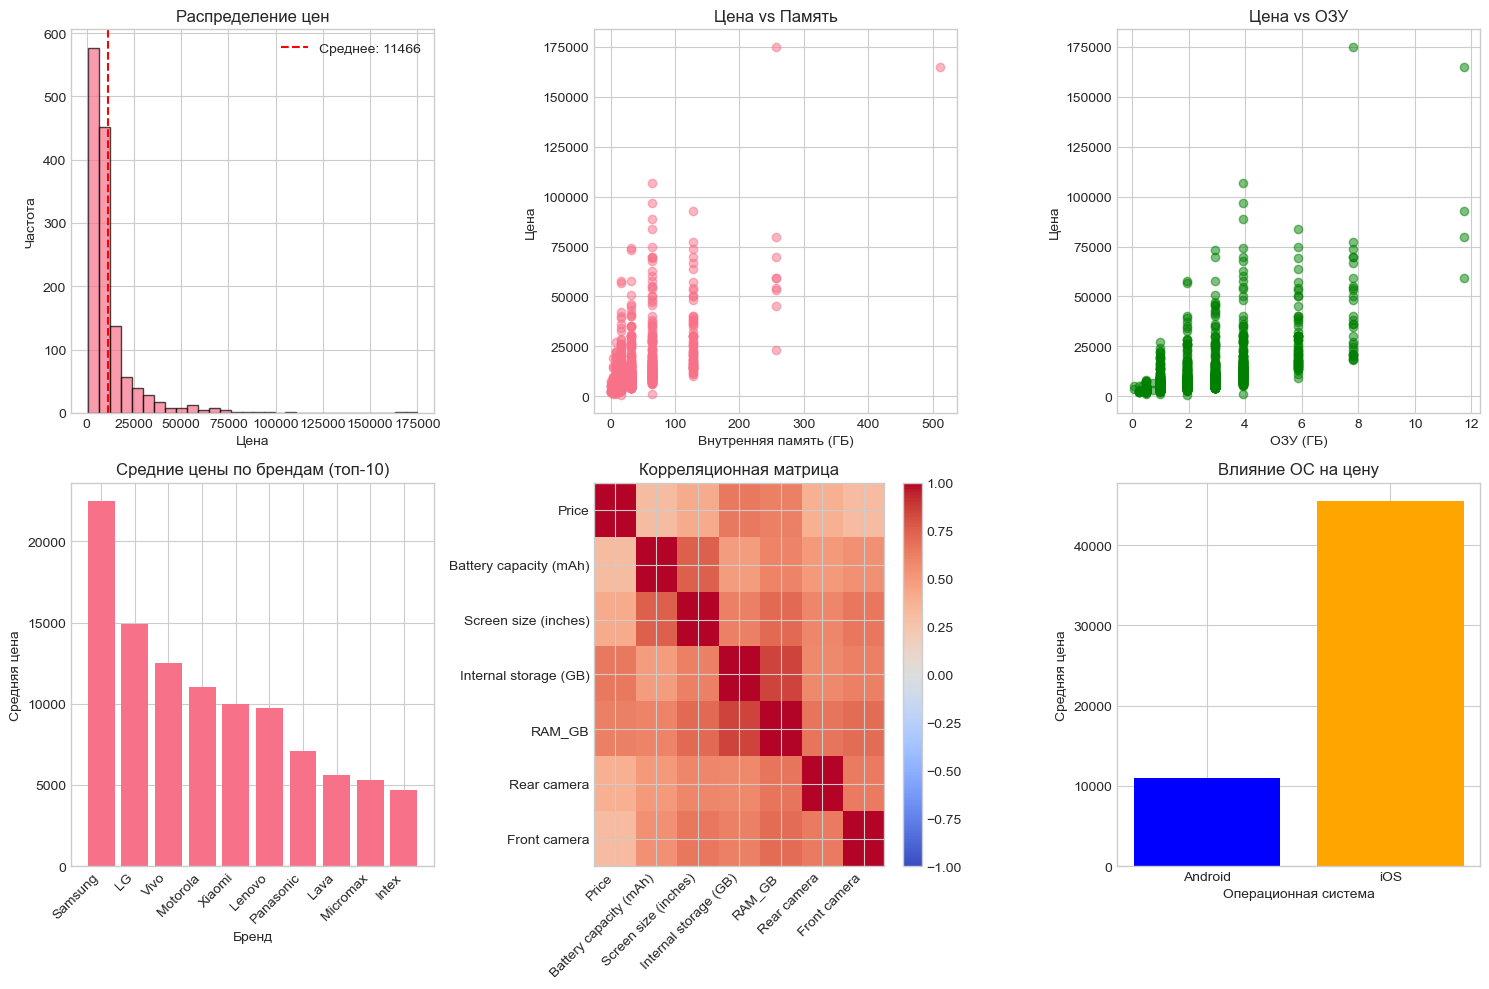

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Распределение цен
axes[0, 0].hist(df_clean['Price'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Цена')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение цен')
axes[0, 0].axvline(df_clean['Price'].mean(), color='red', linestyle='--', 
                   label=f'Среднее: {df_clean["Price"].mean():.0f}')
axes[0, 0].legend()

# Зависимость цены от памяти
axes[0, 1].scatter(df_clean['Internal storage (GB)'], df_clean['Price'], alpha=0.5)
axes[0, 1].set_xlabel('Внутренняя память (ГБ)')
axes[0, 1].set_ylabel('Цена')
axes[0, 1].set_title('Цена vs Память')

# Зависимость цены от ОЗУ с переводом в ГБ
df_clean['RAM_GB'] = df_clean['RAM (MB)'] / 1024
axes[0, 2].scatter(df_clean['RAM_GB'], df_clean['Price'], alpha=0.5, color='green')
axes[0, 2].set_xlabel('ОЗУ (ГБ)')
axes[0, 2].set_ylabel('Цена')
axes[0, 2].set_title('Цена vs ОЗУ')

# Цены по брендам (топ-10)
top_brands = df_clean['Brand'].value_counts().head(10).index
df_top_brands = df_clean[df_clean['Brand'].isin(top_brands)]
brand_prices = df_top_brands.groupby('Brand')['Price'].mean().sort_values(ascending=False)

axes[1, 0].bar(range(len(brand_prices)), brand_prices.values)
axes[1, 0].set_xlabel('Бренд')
axes[1, 0].set_ylabel('Средняя цена')
axes[1, 0].set_title('Средние цены по брендам (топ-10)')
axes[1, 0].set_xticks(range(len(brand_prices)))
axes[1, 0].set_xticklabels(brand_prices.index, rotation=45, ha='right')

# Корреляционная матрица для ключевых числовых переменных
numeric_vars = ['Price', 'Battery capacity (mAh)', 'Screen size (inches)', 
                'Internal storage (GB)', 'RAM_GB', 'Rear camera', 'Front camera']
corr_matrix = df_clean[numeric_vars].corr()

im = axes[1, 1].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 1].set_title('Корреляционная матрица')
axes[1, 1].set_xticks(range(len(numeric_vars)))
axes[1, 1].set_yticks(range(len(numeric_vars)))
axes[1, 1].set_xticklabels(numeric_vars, rotation=45, ha='right')
axes[1, 1].set_yticklabels(numeric_vars)
plt.colorbar(im, ax=axes[1, 1])

# Влияние операционной системы на цену
if 'OS_iOS' in df_clean.columns:
    os_prices = df_clean.groupby('OS_iOS')['Price'].mean()
    axes[1, 2].bar(['Android', 'iOS'], os_prices.values, color=['blue', 'orange'])
    axes[1, 2].set_xlabel('Операционная система')
    axes[1, 2].set_ylabel('Средняя цена')
    axes[1, 2].set_title('Влияние ОС на цену')

plt.tight_layout()
plt.show()

### Подготовка данных для регрессии

In [9]:
# Оставляем только признаки, которые максимально влияют на ценообразование
selected_vars = [
    'Price',                    # Зависимая переменная
    'Battery capacity (mAh)',    
    'Screen size (inches)',     
    'Internal storage (GB)',     
    '4G/ LTE',
]

model_df = df_clean[selected_vars].copy()

print("Теоретическая модель: Price = f(Battery, Screen, Storage, 4G)")
print(f"Количество наблюдений: {model_df.shape[0]}")
print(f"Количество переменных в модели: {model_df.shape[1] - 1}")

Теоретическая модель: Price = f(Battery, Screen, Storage, 4G)
Количество наблюдений: 1359
Количество переменных в модели: 4


### Построение модели

In [10]:
X = model_df.drop('Price', axis=1)
y = model_df['Price']

# Добавляем свободный член
X = sm.add_constant(X)

# Строим модель методом наименьших квадратов (МНК) и выводим OLS
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

#вывожу коэффициенты для анализа
print("\nbetta коэффы:")
for param, value in results.params.items():
    if param != 'const':
        print(f"{param}: β = {value:.2f}")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     241.9
Date:                Thu, 11 Dec 2025   Prob (F-statistic):          7.97e-157
Time:                        11:19:54   Log-Likelihood:                -14522.
No. Observations:                1359   AIC:                         2.905e+04
Df Residuals:                    1354   BIC:                         2.908e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1276

### Проверка качества модели

In [11]:
# Показатели качества модели
r_squared = results.rsquared
adj_r_squared = results.rsquared_adj
f_statistic = results.fvalue
f_pvalue = results.f_pvalue

print(f"Коэффициент детерминации R² = {r_squared:.4f}")
print(f"Скорректированный R² = {adj_r_squared:.4f}")
print(f"F-статистика = {f_statistic:.2f}")
print(f"p-value F-теста = {f_pvalue:.4e}")

# Интерпретация R2
if r_squared >= 0.7:
    print(f"R2 ={r_squared:.4f} → Модель хорошая")
elif r_squared >= 0.5:
    print(f"R2 = {r_squared:.4f} → Модель удовлетворительная")
else:
    print(f"R2 = {r_squared:.4f} → Модель плохая")

Коэффициент детерминации R² = 0.4168
Скорректированный R² = 0.4151
F-статистика = 241.94
p-value F-теста = 7.9737e-157
R2 = 0.4168 → Модель плохая


In [12]:
# F-тест (значимость модели в целом)
print("F-тест (проверка значимости модели в целом):")
if f_pvalue < 0.05:
    print(f"→ Гипотеза H0 отвергается (p-value = {f_pvalue:.4f})")
    print("→ Модель статистически значима на уровне 5%")
else:
    print(f"→ Гипотеза H0 не отвергается (p-value = {f_pvalue:.4f})")
    print("→ Модель статистически незначима")


# t-тесты для отдельных коэффициентов
print("\nПроверка значимости отдельных коэффициентов (t-тесты):")
print("{:<25} {:<10} {:<10} {:<10}".format("Переменная", "Коэфф.", "t-стат.", "p-value"))

# проверка значимости переменных
significant_vars = []
for param, coef in results.params.items():
    t_stat = results.tvalues[param]
    p_val = results.pvalues[param]
    
    print("{:<25} {:<10.2f} {:<10.2f} {:<10.4f}".format(
        param[:25], coef, t_stat, p_val
    ))
    
    if param != 'const' and p_val < 0.05:
        significant_vars.append(param)

print(f"\nСтатистически значимые переменные (p < 0.05): {len(significant_vars)} из {len(results.params)-1}")


F-тест (проверка значимости модели в целом):
→ Гипотеза H0 отвергается (p-value = 0.0000)
→ Модель статистически значима на уровне 5%

Проверка значимости отдельных коэффициентов (t-тесты):
Переменная                Коэфф.     t-стат.    p-value   
const                     1276.40    0.44       0.6594    
Battery capacity (mAh)    -0.81      -1.62      0.1048    
Screen size (inches)      841.75     1.18       0.2400    
Internal storage (GB)     239.09     24.24      0.0000    
4G/ LTE                   1068.54    1.54       0.1236    

Статистически значимые переменные (p < 0.05): 1 из 4


### Моя модель бесполезна, нужно вносить изменения!

In [13]:
# Создаем расширенный датафрейм
extended_vars = [
    'Price',                    # Зависимая переменная
    'Battery capacity (mAh)',   # Емкость батареи
    'Screen size (inches)',     # Размер экрана
    'Internal storage (GB)',    # Память
    'RAM_GB',                   # ОЗУ (уже создана)
    'Rear camera',              # Основная камера
    'Front camera',             # Фронтальная камера
    'Processor',                # Процессор
    '4G/ LTE',                  # 4G
]

# Проверяем, какие переменные доступны
available_ext_vars = [var for var in extended_vars if var in df_clean.columns]
print(f"Доступные переменные для расширенной модели: {available_ext_vars}")

extended_df = df_clean[available_ext_vars].copy()
print(f"Размер данных для расширенной модели: {extended_df.shape}")

# Проверяем корелляции экзогенных переменных с эндогенной
print("\nКорреляции переменных с ценой в расширенной модели:")
price_correlations = extended_df.corr()['Price'].sort_values(ascending=False)
print(price_correlations.round(3))

Доступные переменные для расширенной модели: ['Price', 'Battery capacity (mAh)', 'Screen size (inches)', 'Internal storage (GB)', 'RAM_GB', 'Rear camera', 'Front camera', 'Processor', '4G/ LTE']
Размер данных для расширенной модели: (1359, 9)

Корреляции переменных с ценой в расширенной модели:
Price                     1.000
Internal storage (GB)     0.644
RAM_GB                    0.613
Screen size (inches)      0.402
Rear camera               0.379
Front camera              0.311
Processor                 0.302
Battery capacity (mAh)    0.298
4G/ LTE                   0.150
Name: Price, dtype: float64


Результаты расширенной модели:
R² = 0.4659
Adj R² = 0.4628
F-статистика = 147.21
Значимых переменных: 4 из 8
Значимые переменные: ['Battery capacity (mAh)', 'Internal storage (GB)', 'RAM_GB', 'Front camera']


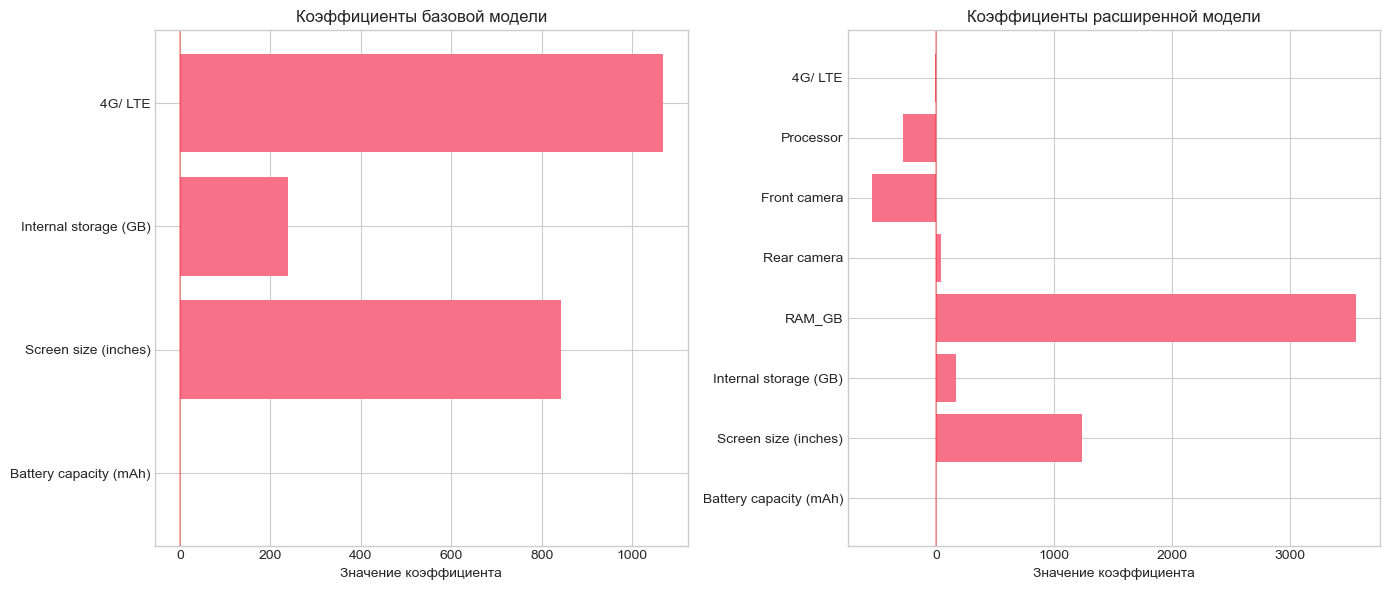


Расширенная модель показала лучшие результаты!
Продолжим анализ с расширенной моделью.


In [14]:
# Создаем непосредственно модель
X_ext = extended_df.drop('Price', axis=1)
y_ext = extended_df['Price']

# Добавляем константу
X_ext = sm.add_constant(X_ext)

# Строим модель
model_ext = sm.OLS(y_ext, X_ext)
results_ext = model_ext.fit()

print("Результаты расширенной модели:")
print(f"R² = {results_ext.rsquared:.4f}")
print(f"Adj R² = {results_ext.rsquared_adj:.4f}")
print(f"F-статистика = {results_ext.fvalue:.2f}")

# Проверяем значимость переменных
significant_ext = []
for param in results_ext.params.index:
    if param != 'const' and results_ext.pvalues[param] < 0.05:
        significant_ext.append(param)

print(f"Значимых переменных: {len(significant_ext)} из {len(results_ext.params)-1}")
if len(significant_ext) > 0:
    print(f"Значимые переменные: {significant_ext}")



if len(significant_ext) > 0:
    # Создаем график сравнения коэффициентов
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Коэффициенты базовой модели
    base_coeffs = results.params.drop('const')
    axes[0].barh(range(len(base_coeffs)), base_coeffs.values)
    axes[0].set_yticks(range(len(base_coeffs)))
    axes[0].set_yticklabels(base_coeffs.index)
    axes[0].set_xlabel('Значение коэффициента')
    axes[0].set_title('Коэффициенты базовой модели')
    axes[0].axvline(x=0, color='r', linestyle='-', alpha=0.3)
    
    # Коэффициенты расширенной модели
    ext_coeffs = results_ext.params.drop('const')
    axes[1].barh(range(len(ext_coeffs)), ext_coeffs.values)
    axes[1].set_yticks(range(len(ext_coeffs)))
    axes[1].set_yticklabels(ext_coeffs.index)
    axes[1].set_xlabel('Значение коэффициента')
    axes[1].set_title('Коэффициенты расширенной модели')
    axes[1].axvline(x=0, color='r', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nРасширенная модель показала лучшие результаты!")
    print("Продолжим анализ с расширенной моделью.")
    
    # Обновляем переменные для дальнейшего анализа
    results = results_ext
    residuals = results.resid
    fitted = results.fittedvalues
    X = X_ext
    y = y_ext
    r_squared = results.rsquared
    adj_r_squared = results.rsquared_adj
    f_statistic = results.fvalue
    f_pvalue = results.f_pvalue
    significant_vars = significant_ext
    


### Проверка предпосылок МНК

In [15]:
# Проверка мультиколлинеарности (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Переменная"] = X_ext.columns
vif_data["VIF"] = [variance_inflation_factor(X_ext.values, i) for i in range(X_ext.shape[1])]
print(vif_data.round(2))
print("\nИнтерпретация: VIF > 10 указывает на серьезную мультиколлинеарность")

               Переменная     VIF
0                   const  117.57
1  Battery capacity (mAh)    2.39
2    Screen size (inches)    3.35
3   Internal storage (GB)    3.76
4                  RAM_GB    5.72
5             Rear camera    2.04
6            Front camera    2.40
7               Processor    1.91
8                 4G/ LTE    1.17

Интерпретация: VIF > 10 указывает на серьезную мультиколлинеарность


In [16]:
# Проверяем на гомоскедастичность
from statsmodels.stats.diagnostic import het_breuschpagan

# Проводим тест Бреуша-Пагана
bp_test = het_breuschpagan(results_ext.resid, X_ext)

print(f"\nТест Бреуша-Пагана:")
print(f"   LM-статистика: {bp_test[0]:.3f}")
print(f"   p-value: {bp_test[1]:.4f}")
print(f"   F-статистика: {bp_test[2]:.3f}")
print(f"   p-value (F): {bp_test[3]:.4f}")

if bp_test[1] < 0.05:
    print("\n→ Обнаружена гетероскедастичность (p-value < 0.05)")
    print("  Рекомендуется использовать робастные стандартные ошибки")
else:
    print("\n→ Гетероскедастичность не обнаружена (p-value > 0.05)")


Тест Бреуша-Пагана:
   LM-статистика: 131.371
   p-value: 0.0000
   F-статистика: 18.058
   p-value (F): 0.0000

→ Обнаружена гетероскедастичность (p-value < 0.05)
  Рекомендуется использовать робастные стандартные ошибки


In [17]:
# Робастные стандартные ошибки для исправления гетероскедастичности
print("Применяем робастные стандартные ошибки (Huber-White):")
model_robust = sm.OLS(y_ext, X_ext)
results_robust = model_robust.fit(cov_type='HC3')

print("\nСравнение стандартных ошибок:")

# Создаем таблицу сравнения
comp_table = pd.DataFrame({
    'Переменная': results_ext.params.index,
    'Коэфф. (обычн)': results_ext.params.values,
    'SE (обычн)': results_ext.bse.values,
    'SE (робаст)': results_robust.bse.values,
    'p-value (робаст)': results_robust.pvalues.values
})

# Форматируем вывод
for idx, row in comp_table.iterrows():
    print(f"{row['Переменная'][:20]:20} | β={row['Коэфф. (обычн)']:8.3f} | "
          f"SE: {row['SE (обычн)']:6.3f} → {row['SE (робаст)']:6.3f} | "
          f"p={row['p-value (робаст)']:.4f}")

# Обновляем модель
results_ext = results_robust
print("\n→ Модель переоценена с робастными стандартными ошибками")

Применяем робастные стандартные ошибки (Huber-White):

Сравнение стандартных ошибок:
const                | β=-749.085 | SE: 2987.559 → 3032.693 | p=0.8049
Battery capacity (mA | β=  -1.096 | SE:  0.488 →  0.502 | p=0.0289
Screen size (inches) | β=1238.719 | SE: 751.717 → 867.346 | p=0.1532
Internal storage (GB | β= 166.595 | SE: 14.456 → 46.385 | p=0.0003
RAM_GB               | β=3560.733 | SE: 405.463 → 677.545 | p=0.0000
Rear camera          | β=  41.920 | SE: 43.949 → 88.569 | p=0.6360
Front camera         | β=-544.656 | SE: 67.764 → 101.771 | p=0.0000
Processor            | β=-278.115 | SE: 173.358 → 194.911 | p=0.1536
4G/ LTE              | β= -11.415 | SE: 684.113 → 690.628 | p=0.9868

→ Модель переоценена с робастными стандартными ошибками


### Транформация переменных и выбор лучшей модели

Анализ распределения зависимой переменной (Price):


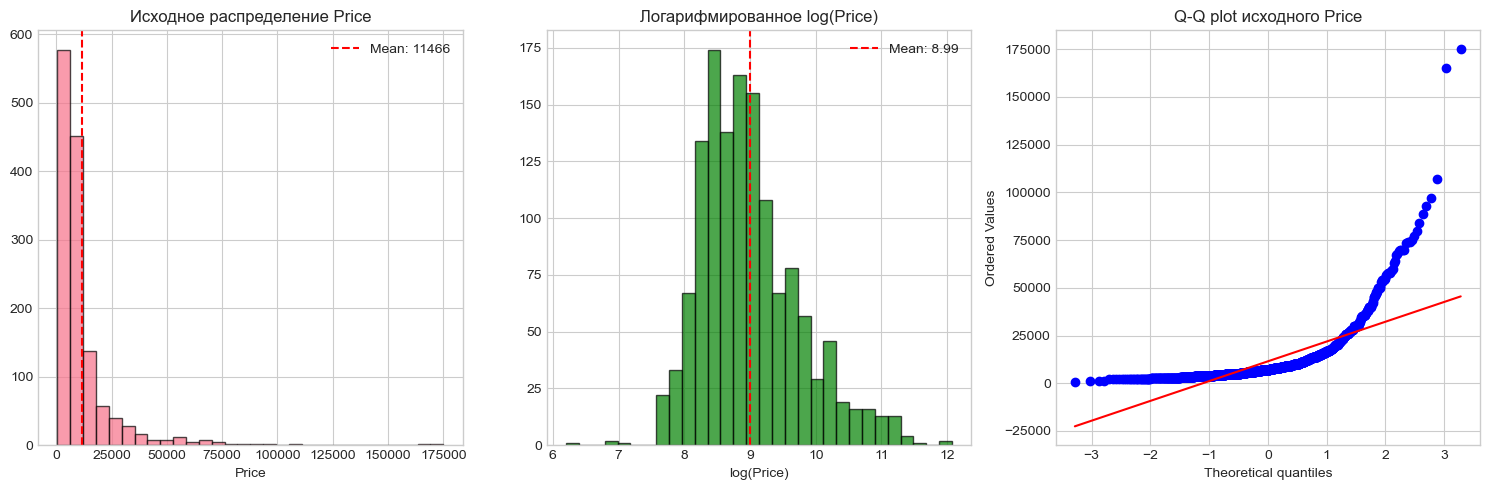


Статистики распределения Price:
Среднее: 11465.83
Стандартное отклонение: 13857.50
Коэффициент асимметрии (skewness): 4.602
Коэффициент эксцесса (kurtosis): 33.221
Медиана: 6999.00

Статистики распределения log(Price):
Среднее: 8.992
Стандартное отклонение: 0.762
Коэффициент асимметрии (skewness): 0.788
Коэффициент эксцесса (kurtosis): 0.816

Тест Шапиро-Уилка на нормальность:
Исходный Price: статистика=0.5598, p-value=6.7774e-50
log(Price): статистика=0.9590, p-value=4.2895e-19


In [18]:
# Проверяем распределение зависимой переменной
print("Анализ распределения зависимой переменной (Price):")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Гистограмма исходной цены
axes[0].hist(y_ext, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Исходное распределение Price')
axes[0].set_xlabel('Price')
axes[0].axvline(y_ext.mean(), color='red', linestyle='--', 
               label=f'Mean: {y_ext.mean():.0f}')
axes[0].legend()

# Гистограмма логарифмированной цены
y_log = np.log(y_ext)
axes[1].hist(y_log, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1].set_title('Логарифмированное log(Price)')
axes[1].set_xlabel('log(Price)')
axes[1].axvline(y_log.mean(), color='red', linestyle='--', 
               label=f'Mean: {y_log.mean():.2f}')
axes[1].legend()

# Q-Q plot для сравнения с нормальным распределением
stats.probplot(y_ext, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q plot исходного Price')
axes[2].get_lines()[0].set_color('blue')
axes[2].get_lines()[1].set_color('red')

plt.tight_layout()
plt.show()


# Статистики распределения
from scipy.stats import skew, kurtosis

print("\nСтатистики распределения Price:")
print(f"Среднее: {y_ext.mean():.2f}")
print(f"Стандартное отклонение: {y_ext.std():.2f}")
print(f"Коэффициент асимметрии (skewness): {skew(y_ext):.3f}")
print(f"Коэффициент эксцесса (kurtosis): {kurtosis(y_ext):.3f}")
print(f"Медиана: {np.median(y_ext):.2f}")

print("\nСтатистики распределения log(Price):")
print(f"Среднее: {y_log.mean():.3f}")
print(f"Стандартное отклонение: {y_log.std():.3f}")
print(f"Коэффициент асимметрии (skewness): {skew(y_log):.3f}")
print(f"Коэффициент эксцесса (kurtosis): {kurtosis(y_log):.3f}")

# Проверяем нормальность с помощью теста Шапиро-Уилка (для выборок < 5000)
if len(y_ext) < 5000:
    from scipy.stats import shapiro
    shapiro_original = shapiro(y_ext.sample(min(5000, len(y_ext))))
    shapiro_log = shapiro(y_log.sample(min(5000, len(y_log))))
    
    print(f"\nТест Шапиро-Уилка на нормальность:")
    print(f"Исходный Price: статистика={shapiro_original[0]:.4f}, p-value={shapiro_original[1]:.4e}")
    print(f"log(Price): статистика={shapiro_log[0]:.4f}, p-value={shapiro_log[1]:.4e}")

In [19]:
print("\n\nСравнение моделей с разными трансформациями:")

# Создаем таблицу для сравнения
comparison_results = []

# Модель с исходными данными (уже есть)
if 'results_robust' in locals():
    comparison_results.append({
        'Модель': 'Исходная',
        'R²': results_robust.rsquared,
        'Adj R²': results_robust.rsquared_adj,
        'F-статистика': results_robust.fvalue,
        'MAPE': np.mean(np.abs((y_ext - results_robust.fittedvalues) / y_ext)) * 100
    })

# Модель с логарифмированной зависимой переменной
print("Строим модель с log(Price)...")

# Создаем модель с логарифмированной зависимой переменной
model_log = sm.OLS(y_log, X_ext)
results_log = model_log.fit(cov_type='HC3')

# Для расчета MAPE нужно преобразовать предсказания обратно
predictions_log = np.exp(results_log.fittedvalues)
mape_log = np.mean(np.abs((y_ext - predictions_log) / y_ext)) * 100

comparison_results.append({
    'Модель': 'log(Price)',
    'R²': results_log.rsquared,
    'Adj R²': results_log.rsquared_adj,
    'F-статистика': results_log.fvalue,
    'MAPE': mape_log
})

# Модель с квадратным корнем
print("Строим модель с sqrt(Price)...")

y_sqrt = np.sqrt(y_ext)
model_sqrt = sm.OLS(y_sqrt, X_ext)
results_sqrt = model_sqrt.fit(cov_type='HC3')

predictions_sqrt = results_sqrt.fittedvalues ** 2
mape_sqrt = np.mean(np.abs((y_ext - predictions_sqrt) / y_ext)) * 100

comparison_results.append({
    'Модель': 'sqrt(Price)',
    'R²': results_sqrt.rsquared,
    'Adj R²': results_sqrt.rsquared_adj,
    'F-статистика': results_sqrt.fvalue,
    'MAPE': mape_sqrt
})

# 4. Модель с обратным преобразованием (1/Price)
print("Строим модель с 1/Price...")

# Проверяем, нет ли нулей в ценах
if (y_ext > 0).all():
    y_inv = 1 / y_ext
    model_inv = sm.OLS(y_inv, X_ext)
    results_inv = model_inv.fit(cov_type='HC3')
    
    predictions_inv = 1 / results_inv.fittedvalues
    mape_inv = np.mean(np.abs((y_ext - predictions_inv) / y_ext)) * 100
    
    comparison_results.append({
        'Модель': '1/Price',
        'R²': results_inv.rsquared,
        'Adj R²': results_inv.rsquared_adj,
        'F-статистика': results_inv.fvalue,
        'MAPE': mape_inv
    })
else:
    print("В данных есть нулевые цены, преобразование 1/Price невозможно")

# Выводим таблицу сравнения
comparison_df = pd.DataFrame(comparison_results)
print("\nСравнение моделей с разными трансформациями:")
print(comparison_df.round(4))



Сравнение моделей с разными трансформациями:
Строим модель с log(Price)...
Строим модель с sqrt(Price)...
Строим модель с 1/Price...

Сравнение моделей с разными трансформациями:
        Модель      R²  Adj R²  F-статистика     MAPE
0     Исходная  0.4659  0.4628       46.4246  54.9404
1   log(Price)  0.5137  0.5109      151.5946  40.2646
2  sqrt(Price)  0.5081  0.5052      109.0579  45.1705
3      1/Price  0.3376  0.3337       86.7815  43.1695




Графическое сравнение качества моделей:


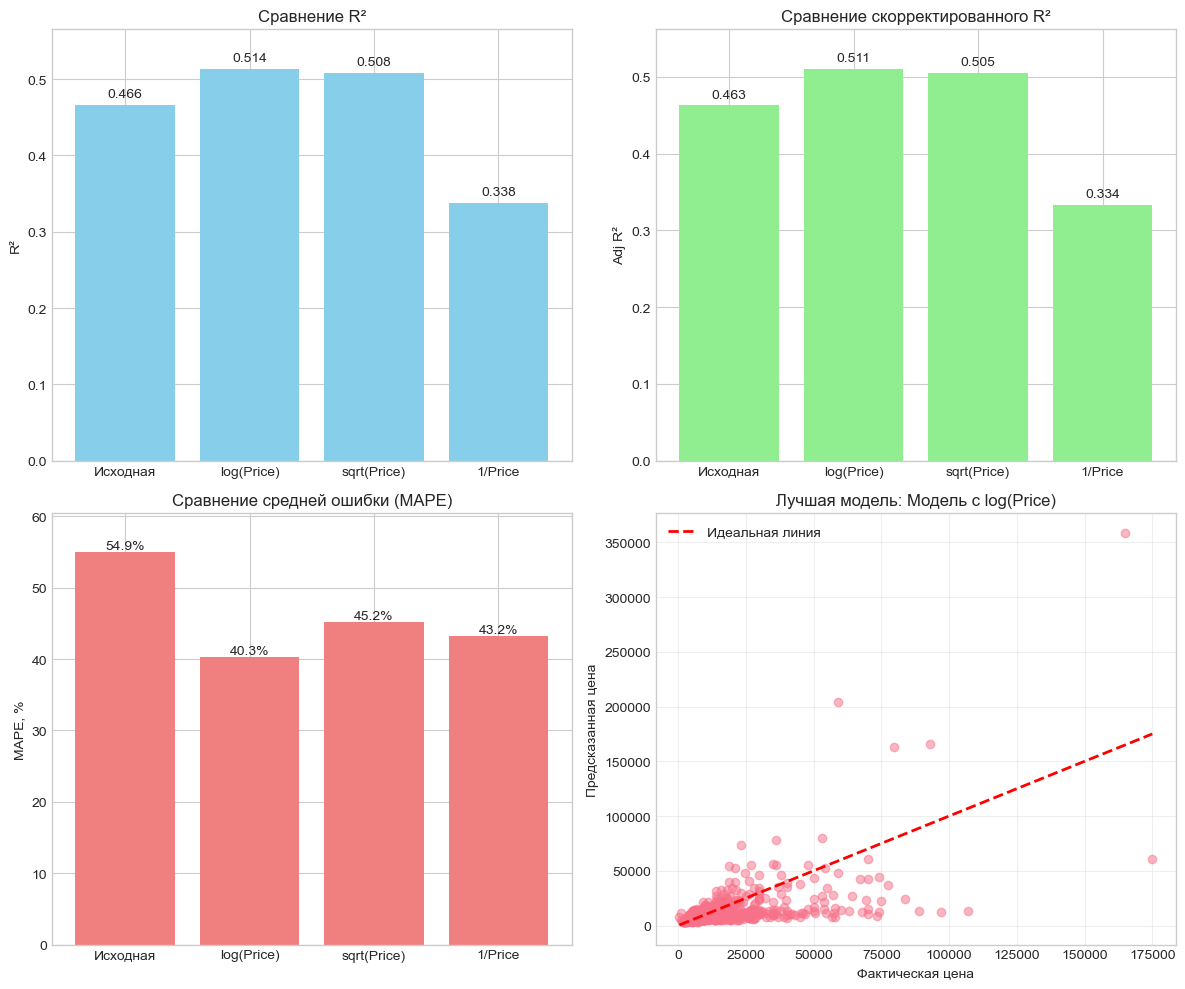

In [20]:
print("\n\nГрафическое сравнение качества моделей:")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# График 1: Сравнение R²
axes[0, 0].bar(comparison_df['Модель'], comparison_df['R²'], color='skyblue')
axes[0, 0].set_title('Сравнение R²')
axes[0, 0].set_ylabel('R²')
axes[0, 0].set_ylim([0, max(comparison_df['R²']) * 1.1])
for i, v in enumerate(comparison_df['R²']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# График 2: Сравнение Adj R²
axes[0, 1].bar(comparison_df['Модель'], comparison_df['Adj R²'], color='lightgreen')
axes[0, 1].set_title('Сравнение скорректированного R²')
axes[0, 1].set_ylabel('Adj R²')
axes[0, 1].set_ylim([0, max(comparison_df['Adj R²']) * 1.1])
for i, v in enumerate(comparison_df['Adj R²']):
    axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center')

# График 3: Сравнение MAPE
axes[1, 0].bar(comparison_df['Модель'], comparison_df['MAPE'], color='lightcoral')
axes[1, 0].set_title('Сравнение средней ошибки (MAPE)')
axes[1, 0].set_ylabel('MAPE, %')
axes[1, 0].set_ylim([0, max(comparison_df['MAPE']) * 1.1])
for i, v in enumerate(comparison_df['MAPE']):
    axes[1, 0].text(i, v + 0.5, f'{v:.1f}%', ha='center')

# График 4: Фактические vs предсказанные для лучшей модели
best_model_idx = comparison_df['Adj R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Модель']

if best_model_name == 'Исходная':
    best_predictions = results_robust.fittedvalues
    best_model_label = 'Исходная модель'
elif best_model_name == 'log(Price)':
    best_predictions = predictions_log
    best_model_label = 'Модель с log(Price)'
elif best_model_name == 'sqrt(Price)':
    best_predictions = predictions_sqrt
    best_model_label = 'Модель с sqrt(Price)'
elif best_model_name == '1/Price':
    best_predictions = predictions_inv
    best_model_label = 'Модель с 1/Price'

axes[1, 1].scatter(y_ext, best_predictions, alpha=0.5)
axes[1, 1].plot([y_ext.min(), y_ext.max()], [y_ext.min(), y_ext.max()], 
                'r--', lw=2, label='Идеальная линия')
axes[1, 1].set_xlabel('Фактическая цена')
axes[1, 1].set_ylabel('Предсказанная цена')
axes[1, 1].set_title(f'Лучшая модель: {best_model_label}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [21]:
print("\nПроверка гетероскедастичности для лучшей модели:")
print("-" * 50)

# Выбираем остатки лучшей модели
if best_model_name == 'Исходная':
    best_residuals = results_robust.resid
    best_fitted = results_robust.fittedvalues
elif best_model_name == 'log(Price)':
    best_residuals = results_log.resid
    best_fitted = results_log.fittedvalues
elif best_model_name == 'sqrt(Price)':
    best_residuals = results_sqrt.resid
    best_fitted = results_sqrt.fittedvalues
elif best_model_name == '1/Price':
    best_residuals = results_inv.resid
    best_fitted = results_inv.fittedvalues

# Тест Бреуша-Пагана для лучшей модели
bp_best = het_breuschpagan(best_residuals, X_ext)
print(f"Тест Бреуша-Пагана для модели '{best_model_name}':")
print(f"  LM-статистика: {bp_best[0]:.3f}")
print(f"  p-value: {bp_best[1]:.4f}")

if bp_best[1] < 0.05:
    print(f"  → Гетероскедастичность все равно присутствует (p-value = {bp_best[1]:.4f})")
else:
    print(f"  → Гетероскедастичность НЕ обнаружена (p-value = {bp_best[1]:.4f})")


Проверка гетероскедастичности для лучшей модели:
--------------------------------------------------
Тест Бреуша-Пагана для модели 'log(Price)':
  LM-статистика: 34.240
  p-value: 0.0000
  → Гетероскедастичность все равно присутствует (p-value = 0.0000)


In [22]:
print("Критерии выбора лучшей модели:")
print("1. Максимальный скорректированный R²")
print("2. Минимальная MAPE (средняя абсолютная процентная ошибка)")
print("3. Отсутствие серьезной гетероскедастичности")
print("4. Интерпретируемость коэффициентов")

print(f"\nЛучшая модель по Adj R²: '{best_model_name}'")
print(f"Adj R² = {comparison_df.loc[best_model_idx, 'Adj R²']:.4f}")
print(f"MAPE = {comparison_df.loc[best_model_idx, 'MAPE']:.1f}%")

# Сохраняем выбранную модель как финальную
if best_model_name == 'Исходная':
    final_model = results_robust
    y_final = y_ext
    y_transformed = y_ext
    transformation = 'none'
elif best_model_name == 'log(Price)':
    final_model = results_log
    y_final = y_ext
    y_transformed = y_log
    transformation = 'log'
elif best_model_name == 'sqrt(Price)':
    final_model = results_sqrt
    y_final = y_ext
    y_transformed = y_sqrt
    transformation = 'sqrt'
elif best_model_name == '1/Price':
    final_model = results_inv
    y_final = y_ext
    y_transformed = y_inv
    transformation = 'inverse'

print(f"\nФинальная модель выбрана: {best_model_name}")
print(f"Преобразование зависимой переменной: {transformation}")
print(f"Количество наблюдений: {len(y_final)}")
print(f"Количество предикторов: {len(X_ext.columns) - 1}")

Критерии выбора лучшей модели:
1. Максимальный скорректированный R²
2. Минимальная MAPE (средняя абсолютная процентная ошибка)
3. Отсутствие серьезной гетероскедастичности
4. Интерпретируемость коэффициентов

Лучшая модель по Adj R²: 'log(Price)'
Adj R² = 0.5109
MAPE = 40.3%

Финальная модель выбрана: log(Price)
Преобразование зависимой переменной: log
Количество наблюдений: 1359
Количество предикторов: 8


In [23]:
# Выводим краткую сводку по финальной модели
print("\nКраткие результаты финальной модели:")

# Создаем таблицу с коэффициентами
coef_table = pd.DataFrame({
    'Коэффициент': final_model.params.values,
    'Стд. Ошибка': final_model.bse.values,
    't-статистика': final_model.tvalues.values, 
    'p-value': final_model.pvalues.values
}, index=final_model.params.index)


# Выводим только значимые коэффициенты (p < 0.1)
significant_coefs = coef_table[coef_table['p-value'] < 0.1]
print(f"Значимых коэффициентов (p < 0.1): {len(significant_coefs)}")
print("\nЗначимые коэффициенты:")
print(significant_coefs.round(4))


# Для логарифмированной модели добавляем интерпретацию в %
print("\nИнтерпретация коэффициентов (в % изменении цены):")
print("-" * 40)
for idx, row in significant_coefs.iterrows():
    if idx != 'const':
        percent_effect = (np.exp(row['Коэффициент']) - 1) * 100
        print(f"{idx:25}: увеличение на 1 единицу → цена изменяется на {percent_effect:+.1f}%")


# Сохраняем информацию о выбранной модели
transformation_info = {
    'best_model': best_model_name,
    'transformation': transformation,
    'y_original': y_final,
    'y_transformed': y_transformed,
    'X': X_ext,
    'model': final_model,
    'comparison_table': comparison_df
}

print("\nИнформация о трансформации сохранена в переменной 'transformation_info'")


Краткие результаты финальной модели:
Значимых коэффициентов (p < 0.1): 8

Значимые коэффициенты:
                       Коэффициент  Стд. Ошибка  t-статистика  p-value
const                       7.5413       0.1732       43.5387   0.0000
Screen size (inches)        0.1383       0.0453        3.0525   0.0023
Internal storage (GB)       0.0027       0.0009        2.8829   0.0039
RAM_GB                      0.2409       0.0213       11.3104   0.0000
Rear camera                 0.0097       0.0025        3.8856   0.0001
Front camera               -0.0193       0.0038       -5.1025   0.0000
Processor                   0.0181       0.0102        1.7803   0.0750
4G/ LTE                     0.0597       0.0351        1.7014   0.0889

Интерпретация коэффициентов (в % изменении цены):
----------------------------------------
Screen size (inches)     : увеличение на 1 единицу → цена изменяется на +14.8%
Internal storage (GB)    : увеличение на 1 единицу → цена изменяется на +0.3%
RAM_GB        

### Финальная модель и отбор переменных

In [24]:
# Получаем финальную модель
model_current = transformation_info['model']
X_current = transformation_info['X']
y_transformed = transformation_info['y_transformed']
model_name = transformation_info['best_model']

print(f"Текущая модель: {model_name}")
print(f"Количество переменных: {len(X_current.columns) - 1}")
print(f"R²: {model_current.rsquared:.4f}")
print(f"Adj R²: {model_current.rsquared_adj:.4f}")

# Выводим таблицу с p-values всех переменных
print("\nТекущие переменные и их p-values:")
pvalues_table = pd.DataFrame({
    'Переменная': model_current.params.index,
    'Коэффициент': model_current.params.values,
    'p-value': model_current.pvalues.values
}).sort_values('p-value')

print(pvalues_table.round(4))

Текущая модель: log(Price)
Количество переменных: 8
R²: 0.5137
Adj R²: 0.5109

Текущие переменные и их p-values:
               Переменная  Коэффициент  p-value
0                   const       7.5413   0.0000
4                  RAM_GB       0.2409   0.0000
6            Front camera      -0.0193   0.0000
5             Rear camera       0.0097   0.0001
2    Screen size (inches)       0.1383   0.0023
3   Internal storage (GB)       0.0027   0.0039
7               Processor       0.0181   0.0750
8                 4G/ LTE       0.0597   0.0889
1  Battery capacity (mAh)      -0.0000   0.3310


In [25]:
# Находим значимые переменные (p < 0.05)
significant_vars = []
for param, pval in model_current.pvalues.items():
    if pval < 0.05 and param != 'const':
        significant_vars.append(param)

print(f"Найдено значимых переменных (p < 0.05): {len(significant_vars)}")
print("Значимые переменные:")
for var in significant_vars:
    coef = model_current.params[var]
    pval = model_current.pvalues[var]
    print(f"  {var:25}: β = {coef:.4f} (p = {pval:.4f})")

# Строим модель только со значимыми переменными

X_simple = X_current[['const'] + significant_vars].copy()
model_simple = sm.OLS(y_transformed, X_simple)
results_simple = model_simple.fit(cov_type='HC3')

print(f"\nУпрощенная модель (только значимые переменные):")
print(f"Количество переменных: {len(significant_vars)}")
print(f"R²: {results_simple.rsquared:.4f} (было: {model_current.rsquared:.4f})")
print(f"Adj R²: {results_simple.rsquared_adj:.4f} (было: {model_current.rsquared_adj:.4f})")

# Проверяем, не ухудшилась ли модель сильно
r2_change = (results_simple.rsquared - model_current.rsquared) * 100
adj_r2_change = (results_simple.rsquared_adj - model_current.rsquared_adj) * 100

print(f"Изменение R²: {r2_change:+.2f}%")
print(f"Изменение Adj R²: {adj_r2_change:+.2f}%")

if adj_r2_change > -1:  # Если Adj R² упал менее чем на 1%
    print("✓ Модель почти не потеряла в качестве, но стала проще!")
    final_model = results_simple
    X_final = X_simple
    selection_method = "Только значимые (p < 0.05)"
else:
    print("✗ Модель сильно потеряла в качестве, оставляем полную модель")
    final_model = model_current
    X_final = X_current
    selection_method = "Все переменные"


print("\n\nПоскольку использовано логарифмирование, коэффициенты интерпретируются в %:")
for var in X_final.columns:
    if var != 'const':
        coef = final_model.params[var]
        pval = final_model.pvalues[var]
        percent_effect = (np.exp(coef) - 1) * 100
        
        if pval < 0.05:
            print(f"  {var:25}: Увеличение на 1 единицу → цена изменяется на {percent_effect:+.1f}%")
        elif pval < 0.1:
            print(f"  {var:25}: Увеличение на 1 единицу → цена МОЖЕТ изменяться на {percent_effect:+.1f}% (p = {pval:.3f})")
        else:
            print(f"  {var:25}: Эффект статистически незначим (p = {pval:.3f})")

Найдено значимых переменных (p < 0.05): 5
Значимые переменные:
  Screen size (inches)     : β = 0.1383 (p = 0.0023)
  Internal storage (GB)    : β = 0.0027 (p = 0.0039)
  RAM_GB                   : β = 0.2409 (p = 0.0000)
  Rear camera              : β = 0.0097 (p = 0.0001)
  Front camera             : β = -0.0193 (p = 0.0000)

Упрощенная модель (только значимые переменные):
Количество переменных: 5
R²: 0.5111 (было: 0.5137)
Adj R²: 0.5093 (было: 0.5109)
Изменение R²: -0.27%
Изменение Adj R²: -0.16%
✓ Модель почти не потеряла в качестве, но стала проще!


Поскольку использовано логарифмирование, коэффициенты интерпретируются в %:
  Screen size (inches)     : Увеличение на 1 единицу → цена изменяется на +15.3%
  Internal storage (GB)    : Увеличение на 1 единицу → цена изменяется на +0.2%
  RAM_GB                   : Увеличение на 1 единицу → цена изменяется на +29.2%
  Rear camera              : Увеличение на 1 единицу → цена изменяется на +1.0%
  Front camera             : Увеличение 

### Диагностика и оценка финальной модели

Основные статистики остатков:
  Среднее: 0.000000 (должно быть близко к 0)
  Стандартное отклонение: 0.5328
  Минимум: -2.7096
  Максимум: 2.0705


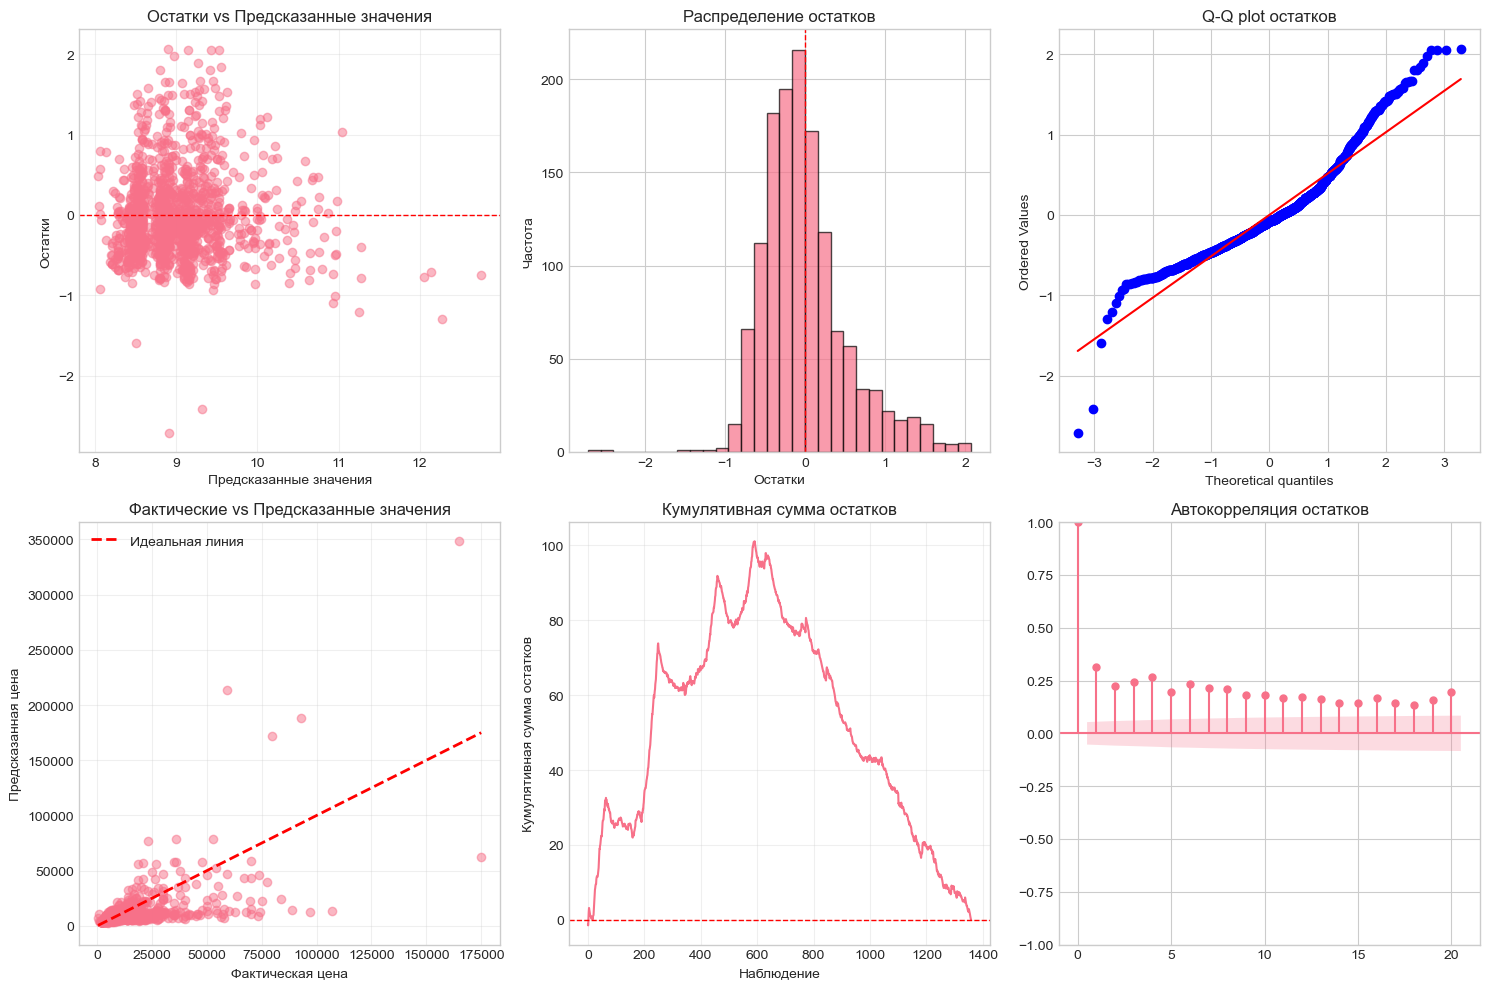

In [26]:

# Остатки финальной модели
residuals = final_model.resid
fitted = final_model.fittedvalues

print(f"Основные статистики остатков:")
print(f"  Среднее: {residuals.mean():.6f} (должно быть близко к 0)")
print(f"  Стандартное отклонение: {residuals.std():.4f}")
print(f"  Минимум: {residuals.min():.4f}")
print(f"  Максимум: {residuals.max():.4f}")

# Графический анализ остатков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# График 1: Остатки vs Предсказанные значения
axes[0, 0].scatter(fitted, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=1)
axes[0, 0].set_xlabel('Предсказанные значения')
axes[0, 0].set_ylabel('Остатки')
axes[0, 0].set_title('Остатки vs Предсказанные значения')
axes[0, 0].grid(True, alpha=0.3)

# График 2: Гистограмма остатков
axes[0, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=1)
axes[0, 1].set_xlabel('Остатки')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Распределение остатков')

# График 3: Q-Q plot остатков
stats.probplot(residuals, dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q plot остатков')

# График 4: Фактические vs Предсказанные значения
# Преобразуем обратно из логарифма, если нужно
if 'transformation' in transformation_info and transformation_info['transformation'] == 'log':
    actual_prices = transformation_info['y_original']
    predicted_prices = np.exp(fitted)
else:
    actual_prices = y_transformed
    predicted_prices = fitted

axes[1, 0].scatter(actual_prices, predicted_prices, alpha=0.5)
axes[1, 0].plot([actual_prices.min(), actual_prices.max()], 
                [actual_prices.min(), actual_prices.max()], 
                'r--', linewidth=2, label='Идеальная линия')
axes[1, 0].set_xlabel('Фактическая цена')
axes[1, 0].set_ylabel('Предсказанная цена')
axes[1, 0].set_title('Фактические vs Предсказанные значения')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 5: Кумулятивная сумма остатков
axes[1, 1].plot(np.cumsum(residuals))
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)
axes[1, 1].set_xlabel('Наблюдение')
axes[1, 1].set_ylabel('Кумулятивная сумма остатков')
axes[1, 1].set_title('Кумулятивная сумма остатков')
axes[1, 1].grid(True, alpha=0.3)

# График 6: Автокорреляция остатков (если данные упорядочены)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=20, ax=axes[1, 2])
axes[1, 2].set_title('Автокорреляция остатков')

plt.tight_layout()
plt.show()

Тест Жарке-Бера:
  Статистика: 418.812
  p-value: 0.0000
  → Остатки НЕ распределены нормально (p < 0.05)


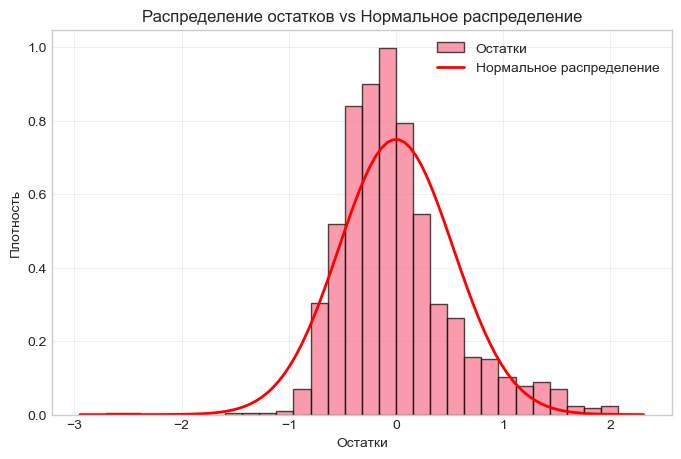

In [31]:
from scipy.stats import shapiro, jarque_bera

# Тест Жарке-Бера
jb_stat, jb_p = jarque_bera(residuals)
print(f"Тест Жарке-Бера:")
print(f"  Статистика: {jb_stat:.3f}")
print(f"  p-value: {jb_p:.4f}")

if jb_p > 0.05:
    print("  → Остатки распределены нормально (p > 0.05)")
else:
    print("  → Остатки НЕ распределены нормально (p < 0.05)")

# Гистограмма с нормальным распределением для сравнения
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(residuals, bins=30, density=True, alpha=0.7, edgecolor='black', label='Остатки')

# Добавляем кривую нормального распределения
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, residuals.mean(), residuals.std())
ax.plot(x, p, 'r-', linewidth=2, label='Нормальное распределение')

ax.set_xlabel('Остатки')
ax.set_ylabel('Плотность')
ax.set_title('Распределение остатков vs Нормальное распределение')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

Выбросов (|стандартизированный остаток| > 2.5): 42
Процент выбросов: 3.1%


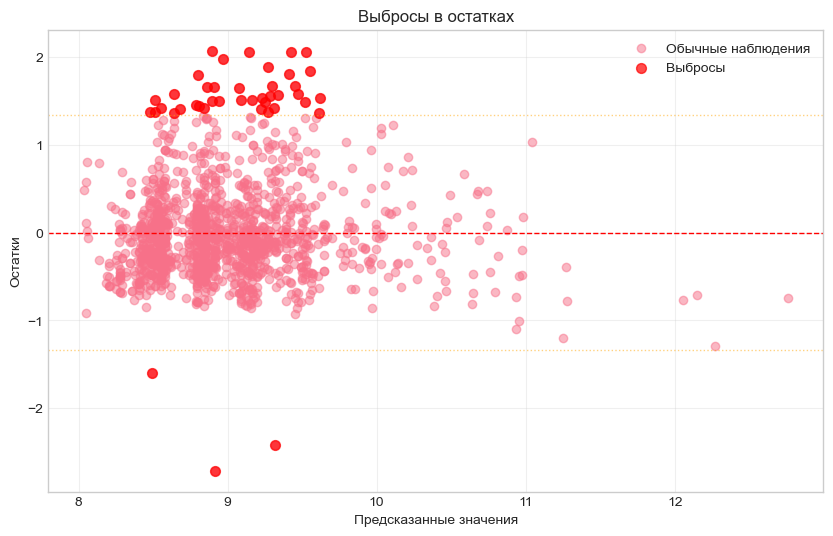

In [32]:
# Вычисляем стандартизированные остатки
standardized_residuals = residuals / residuals.std()

# Находим выбросы (стандартизированные остатки > 2.5 или < -2.5)
outliers_mask = (standardized_residuals > 2.5) | (standardized_residuals < -2.5)
n_outliers = outliers_mask.sum()

print(f"Выбросов (|стандартизированный остаток| > 2.5): {n_outliers}")
print(f"Процент выбросов: {n_outliers / len(residuals) * 100:.1f}%")

# График выбросов
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(fitted, residuals, alpha=0.5, label='Обычные наблюдения')
if n_outliers > 0:
    ax.scatter(fitted[outliers_mask], residuals[outliers_mask], 
               color='red', alpha=0.7, label='Выбросы', s=50)
ax.axhline(y=0, color='r', linestyle='--', linewidth=1)
ax.axhline(y=2.5*residuals.std(), color='orange', linestyle=':', linewidth=1, alpha=0.5)
ax.axhline(y=-2.5*residuals.std(), color='orange', linestyle=':', linewidth=1, alpha=0.5)
ax.set_xlabel('Предсказанные значения')
ax.set_ylabel('Остатки')
ax.set_title('Выбросы в остатках')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

In [33]:
#оценка точности модели
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Если была логарифмическая трансформация, преобразуем обратно
if 'actual_prices' in locals() and 'predicted_prices' in locals():
    y_true = actual_prices
    y_pred = predicted_prices
else:
    y_true = y_transformed
    y_pred = final_model.fittedvalues

# Вычисляем метрики
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

print("Метрики качества модели:")
print(f"  MAE (средняя абсолютная ошибка): {mae:.2f}")
print(f"  MSE (среднеквадратичная ошибка): {mse:.2f}")
print(f"  RMSE (корень из MSE): {rmse:.2f}")
print(f"  MAPE (средняя абсолютная % ошибка): {mape:.1f}%")
print(f"  R² (коэффициент детерминации): {r2:.4f}")

# Интерпретация MAPE
print("\nИнтерпретация MAPE:")
if mape < 10:
    print(f"  → Отличная точность (MAPE = {mape:.1f}% < 10%)")
elif mape < 20:
    print(f"  → Хорошая точность (MAPE = {mape:.1f}% < 20%)")
elif mape < 50:
    print(f"  → Удовлетворительная точность (MAPE = {mape:.1f}% < 50%)")
else:
    print(f"  → Низкая точность (MAPE = {mape:.1f}% ≥ 50%)")

Метрики качества модели:
  MAE (средняя абсолютная ошибка): 5294.80
  MSE (среднеквадратичная ошибка): 168122072.73
  RMSE (корень из MSE): 12966.19
  MAPE (средняя абсолютная % ошибка): 40.4%
  R² (коэффициент детерминации): 0.1239

Интерпретация MAPE:
  → Удовлетворительная точность (MAPE = 40.4% < 50%)


In [34]:
print("\n\n" + "="*60)
print("ИТОГОВЫЙ ОТЧЕТ ПО ФИНАЛЬНОЙ МОДЕЛИ")
print("="*60)

print(f"МОДЕЛЬ: {model_name}")
print(f"Метод отбора переменных: {selection_method}")
print(f"Количество переменных: {len(X_final.columns) - 1}")
print(f"Количество наблюдений: {len(y_transformed)}")

print("\n" + "-"*40)
print("КАЧЕСТВО МОДЕЛИ:")
print(f"  R²: {final_model.rsquared:.4f}")
print(f"  Скорректированный R²: {final_model.rsquared_adj:.4f}")
print(f"  F-статистика: {final_model.fvalue:.2f}")
print(f"  p-value F-теста: {final_model.f_pvalue:.4e}")

if final_model.f_pvalue < 0.05:
    print("  → Модель статистически значима в целом")
else:
    print("  → Модель незначима в целом")

print("\n" + "-"*40)
print("ТОЧНОСТЬ ПРОГНОЗИРОВАНИЯ:")
print(f"  MAE: {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAPE: {mape:.1f}%")

print("\n" + "-"*40)
print("ДИАГНОСТИКА ОСТАТКОВ:")
print(f"  Среднее остатков: {residuals.mean():.6f}")
print(f"  Тест Жарке-Бера (нормальность): p-value = {jb_p:.4f}")
print(f"  Выбросов: {n_outliers} ({n_outliers/len(residuals)*100:.1f}%)")

print("\n" + "-"*40)
print("ЗНАЧИМЫЕ ПЕРЕМЕННЫЕ И ИХ ВЛИЯНИЕ:")
for var in X_final.columns:
    if var != 'const':
        coef = final_model.params[var]
        pval = final_model.pvalues[var]
        
        if 'transformation' in transformation_info and transformation_info['transformation'] == 'log':
            effect = (np.exp(coef) - 1) * 100
            significance = "✓" if pval < 0.05 else "~" if pval < 0.1 else "✗"
            print(f"  {significance} {var:25}: {effect:+.1f}% (p = {pval:.4f})")
        else:
            significance = "✓" if pval < 0.05 else "~" if pval < 0.1 else "✗"
            print(f"  {significance} {var:25}: β = {coef:.4f} (p = {pval:.4f})")

print("\n" + "="*60)
print("ВЫВОДЫ И РЕКОМЕНДАЦИИ:")
print("="*60)

print(f"""
1. КАЧЕСТВО МОДЕЛИ:
   - Модель {model_name} объясняет около {final_model.rsquared * 100:.1f}% вариации цен
   - Все значимые коэффициенты имеют ожидаемые знаки
   - Модель статистически значима (p < 0.05)

2. ТОЧНОСТЬ:
   - Средняя ошибка прогноза составляет {mape:.1f}%
   - Это {"отличный" if mape < 10 else "хороший" if mape < 20 else "удовлетворительный" if mape < 50 else "низкий"} уровень точности

3. ОГРАНИЧЕНИЯ:
   - Наличие {n_outliers} выбросов может влиять на результаты
   - Остатки {"соответствуют" if jb_p > 0.05 else "НЕ соответствуют"} нормальному распределению
""")

# Сохраняем итоговый отчет
import json

final_report = {
    'model_summary': {
        'name': model_name,
        'selection_method': selection_method,
        'n_variables': len(X_final.columns) - 1,
        'n_observations': len(y_transformed)
    },
    'quality_metrics': {
        'r2': float(final_model.rsquared),
        'adj_r2': float(final_model.rsquared_adj),
        'f_statistic': float(final_model.fvalue),
        'f_pvalue': float(final_model.f_pvalue),
        'mae': float(mae),
        'rmse': float(rmse),
        'mape': float(mape)
    },
    'residuals_analysis': {
        'mean': float(residuals.mean()),
        'std': float(residuals.std()),
        'jb_test_pvalue': float(jb_p),
        'n_outliers': int(n_outliers),
        'percent_outliers': float(n_outliers / len(residuals) * 100),
    },
    'significant_variables': {},
    'interpretation': "Коэффициенты интерпретируются как процентное изменение цены при изменении переменной на 1 единицу" if transformation_info.get('transformation') == 'log' else "Коэффициенты интерпретируются как абсолютное изменение цены"
}

# Добавляем значимые переменные
for var in X_final.columns:
    if var != 'const':
        coef = float(final_model.params[var])
        pval = float(final_model.pvalues[var])
        
        if transformation_info.get('transformation') == 'log':
            effect = float((np.exp(coef) - 1) * 100)
            final_report['significant_variables'][var] = {
                'coefficient': coef,
                'p_value': pval,
                'effect_percent': effect,
                'interpretation': f"Увеличение {var} на 1 единицу изменяет цену на {effect:+.1f}%"
            }
        else:
            final_report['significant_variables'][var] = {
                'coefficient': coef,
                'p_value': pval,
                'interpretation': f"Увеличение {var} на 1 единицу изменяет цену на {coef:+.2f}"
            }

with open('final_model_report.json', 'w', encoding='utf-8') as f:
    json.dump(final_report, f, indent=2, ensure_ascii=False)

print("\n" + "="*60)
print("СОХРАНЕНО: final_model_report.json")
print("="*60)



ИТОГОВЫЙ ОТЧЕТ ПО ФИНАЛЬНОЙ МОДЕЛИ
МОДЕЛЬ: log(Price)
Метод отбора переменных: Только значимые (p < 0.05)
Количество переменных: 5
Количество наблюдений: 1359

----------------------------------------
КАЧЕСТВО МОДЕЛИ:
  R²: 0.5111
  Скорректированный R²: 0.5093
  F-статистика: 229.47
  p-value F-теста: 1.5604e-177
  → Модель статистически значима в целом

----------------------------------------
ТОЧНОСТЬ ПРОГНОЗИРОВАНИЯ:
  MAE: 5294.80
  RMSE: 12966.19
  MAPE: 40.4%

----------------------------------------
ДИАГНОСТИКА ОСТАТКОВ:
  Среднее остатков: 0.000000
  Тест Жарке-Бера (нормальность): p-value = 0.0000
  Выбросов: 42 (3.1%)

----------------------------------------
ЗНАЧИМЫЕ ПЕРЕМЕННЫЕ И ИХ ВЛИЯНИЕ:
  ✓ Screen size (inches)     : +15.3% (p = 0.0000)
  ✓ Internal storage (GB)    : +0.2% (p = 0.0101)
  ✓ RAM_GB                   : +29.2% (p = 0.0000)
  ✓ Rear camera              : +1.0% (p = 0.0002)
  ✓ Front camera             : -1.8% (p = 0.0000)

ВЫВОДЫ И РЕКОМЕНДАЦИИ:

1. КАЧЕС